# STAT 5310 Test #3 Due December 12, 2018 at 5:30pm
### Tom Wilson

## 1. Predict the number of applications received using the other variables in the college data set. 

In [136]:
library(tidyverse)
library(data.table)
library(glmnet)
library(glmnetUtils)
library(MASS)
library(caret)
library(leaps)

In [137]:
college <- fread('../data/College.csv')

### a.
Split the data set into a training set and a test set.

In [138]:
college <- college %>% subset(,-V1)

In [139]:
n=nrow(college)
train_sample <- runif(n,0,1) > 1 - 0.75 #random uniform sample
college_train <- college[train_sample,] %>% select_if(is.numeric)
college_test  <- college[!train_sample,] %>% select_if(is.numeric)

In [140]:
x_train <- college_train %>% subset(,-Apps) 
y_train <- college_train %>% subset(, Apps) 
x_test  <- college_test  %>% subset(,-Apps) 
y_test  <- college_test  %>% subset(, Apps) 

### b.
Fit a linear model using least squares on the training set, and report the test error obtained.

In [141]:
linear_model <- lm(data = college_train, formula = Apps~.)

In [142]:
residual <- predict(linear_model,newdata = college_test) - college_test$Apps
RMSE <- sqrt(sum(residual^2))
paste('Root Mean Squared Error on test dataset = ',RMSE)

[1] "Root Mean Squared Error on test dataset =  12854.7300032995"

### c.
Fit a ridge regression model on the training set, with λ chosen by cross-validation.  Report the test error obtained.

In [143]:
k <- 10
folds <- sample(1:k,nrow(college_train),replace <- TRUE)
cv.errors <- setNames(data.frame(matrix(ncol = 3, nrow = 0)), c("fold", "lambda", "mae"))

In [144]:
for(j in 1:k-1){
    for(lambda in seq(0,1,0.1)) {    
        fit <- lm.ridge(formula = Apps~.,data=college_train[folds!=j,], lambda=lambda)
        pred <- as.vector(as.matrix(cbind(const=1,x_train[folds==j])) %*% coef(fit))
        rmse <- sqrt( sum( ( y_train[folds==j] - pred)^2 ))
        cv.errors <- rbind(cv.errors,c(j,lambda,rmse))
    }
}

ERROR: Error in data.table::data.table(...): Item 2 has no length. Provide at least one item (such as NA, NA_integer_ etc) to be repeated to match the 1 row in the longest column. Or, all columns can be 0 length, for insert()ing rows into.


In [145]:
colnames(cv.errors) <- c("fold", "lambda", "rmse")

In [146]:
summary_of_error <- cv.errors %>% group_by(lambda) %>% summarise(mean_rmse = mean(rmse))

Warning message in min(x):
“no non-missing arguments to min; returning Inf”Warning message in max(x):
“no non-missing arguments to max; returning -Inf”Warning message in min(x):
“no non-missing arguments to min; returning Inf”Warning message in max(x):
“no non-missing arguments to max; returning -Inf”

ERROR: Error in plot.window(...): need finite 'xlim' values


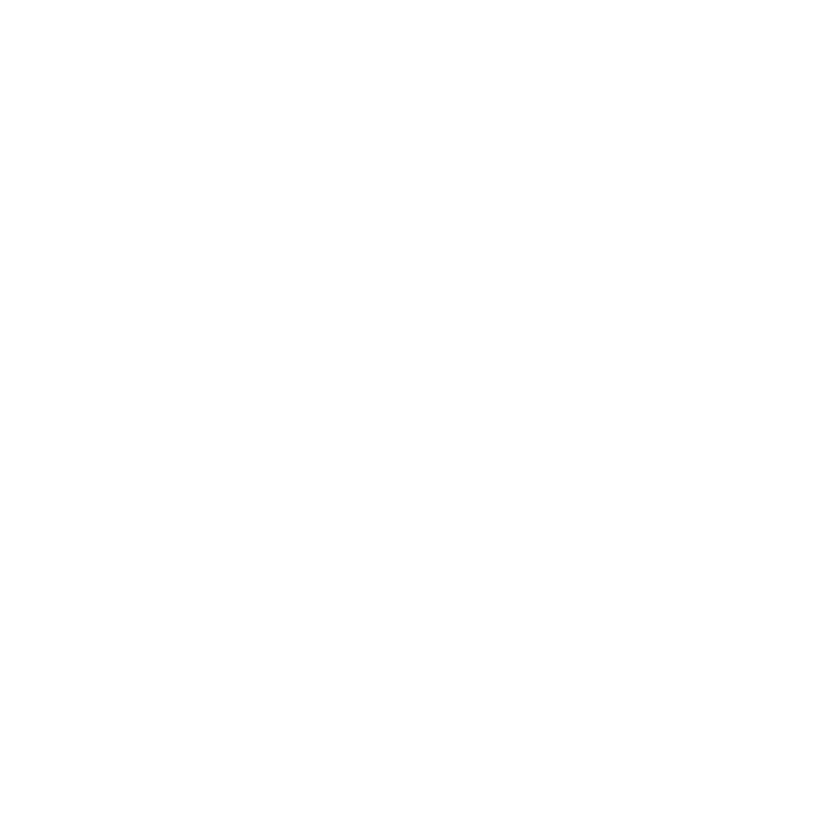

In [148]:
plot(x = summary_of_error$lambda,y=summary_of_error$mean_rmse)

Root mean squared error steadily improves with larger values of lambda. 

## 2. 
Consider the Boston housing data set, from the MASS library.

In [120]:
Boston %>% head()

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


### a.
Based on this data set, provide an estimate for the population mean of medv.  Call this estimate  .

In [133]:
estimate <- mean(Boston$medv)
paste("an estimate for the population mean of medv is ",estimate)

[1] "an estimate for the population mean of medv is  22.5328063241107"

### b.
Provide an estimate of the standard error of   Interpret this result.
Hint:  We can compute the standard error of the sample mean by dividing the sample standard deviation by the square root of the number of observations.

In [134]:
n <- nrow(Boston)
SE <- sd(Boston$medv)/sqrt(n)
paste("an estimate of the standard error of the population mean of medv is",SE)

[1] "an estimate of the standard error of the population mean of medv is 0.408861147497535"

### c.
Now estimate the standard error of  using the bootstrap.  How does this compare to your answer from (b)?

In [135]:
alpha.fn=function(data,index){
 X=data$X[index]
 Y=data$Y[index]
 return((var(Y)-cov(X,Y))/(var(X)+var(Y)-2*cov(X,Y)))
 }
alpha.fn(Portfolio,1:100)
set.seed(1)
alpha.fn(Portfolio,sample(100,100,replace=T))
boot(Portfolio,alpha.fn,R=1000)

ERROR: Error in alpha.fn(Portfolio, 1:100): object 'Portfolio' not found


### d.
Based on your bootstrap estimate from (c), provide a 95% confidence interval for the mean of medv. compare it to the results obtained using t.test(Boston$medv).

Hint:  You can approximate a 95% confidence interval using the formula 

In [ ]:
# Chapter 6 Lab 1: Subset Selection Methods
#Install package ISLR and leaps
# Best Subset Selection
library(ISLR)
fix(Hitters)
names(Hitters)
dim(Hitters)
sum(is.na(Hitters$Salary))
Hitters=na.omit(Hitters)
dim(Hitters)
#reduces the rows from 322 to 263
sum(is.na(Hitters))

In [ ]:
library(leaps)
#regsubests from leaps provides a model search for the best subsets of each size up to nvmax exhaustive
#is the default method

regfit.full=regsubsets(Salary~.,Hitters)
summary(regfit.full)
regfit.full=regsubsets(Salary~.,data=Hitters,nvmax=19)
reg.summary=summary(regfit.full)
names(reg.summary)

reg.summary$rsq

par(mfrow=c(2,2))
plot(reg.summary$rss,xlab="Number of Variables",ylab="RSS",type="l")
plot(reg.summary$adjr2,xlab="Number of Variables",ylab="Adjusted RSq",type="l")
which.max(reg.summary$adjr2)
#which.max returns 11 which we then include in the previous plot for ajr2
points(11,reg.summary$adjr2[11], col="red",cex=2,pch=20)

plot(reg.summary$cp,xlab="Number of Variables",ylab="Cp",type='l')
which.min(reg.summary$cp)
#returns 10 which we then include in the previous Cp plot
points(10,reg.summary$cp[10],col="red",cex=2,pch=20)

which.min(reg.summary$bic)
#returns 6
plot(reg.summary$bic,xlab="Number of Variables",ylab="BIC",type='l')
points(6,reg.summary$bic[6],col="red",cex=2,pch=20)


plot(regfit.full,scale="r2")
plot(regfit.full,scale="adjr2")
plot(regfit.full,scale="Cp")
plot(regfit.full,scale="bic")
#Returns the coefficients from the model search of variables
coef(regfit.full,6)

# Forward and Backward Stepwise Selection

regfit.fwd=regsubsets(Salary~.,data=Hitters,nvmax=19,method="forward")
summary(regfit.fwd)
regfit.bwd=regsubsets(Salary~.,data=Hitters,nvmax=19,method="backward")
summary(regfit.bwd)
#Exhaustive comes up with a slightly different 7 variable model than Forward and Backward
coef(regfit.full,7)
coef(regfit.fwd,7)
coef(regfit.bwd,7)

# Choosing Among Models

set.seed(1)
#Creates a vector of True and Falses with length equal to the rows of Hitters
train=sample(c(TRUE,FALSE), nrow(Hitters),rep=TRUE)
test=(!train)

#Find the best subsets using only the True rows from train
regfit.best=regsubsets(Salary~.,data=Hitters[train,],nvmax=19)

test.mat=model.matrix(Salary~.,data=Hitters[test,])

#To calculate the validation error for each model
val.errors=rep(NA,19)
for(i in 1:19){
   coefi=coef(regfit.best,id=i)
   pred=test.mat[,names(coefi)]%*%coefi
   val.errors[i]=mean((Hitters$Salary[test]-pred)^2)
}
val.errors

which.min(val.errors)
#Returns 10

coef(regfit.best,10)


predict.regsubsets=function(object,newdata,id,...){
  form=as.formula(object$call[[2]])
  mat=model.matrix(form,newdata)
  coefi=coef(object,id=id)
  xvars=names(coefi)
  mat[,xvars]%*%coefi
  }

#Slightly different variables selected when using the full data set as compared to the training
regfit.best=regsubsets(Salary~.,data=Hitters,nvmax=19)
coef(regfit.best,10)

#10-fold Cross-validation
k=10
set.seed(1)
folds=sample(1:k,nrow(Hitters),replace=TRUE)
cv.errors=matrix(NA,k,19, dimnames=list(NULL, paste(1:19)))
for(j in 1:k){
  best.fit=regsubsets(Salary~.,data=Hitters[folds!=j,],nvmax=19)
  for(i in 1:19){
    pred=predict(best.fit,Hitters[folds==j,],id=i)
    cv.errors[j,i]=mean( (Hitters$Salary[folds==j]-pred)^2)
    }
  }
mean.cv.errors=apply(cv.errors,2,mean)
mean.cv.errors

par(mfrow=c(1,1))
plot(mean.cv.errors,type='b')
#11 seems to have the smallest error

reg.best=regsubsets(Salary~.,data=Hitters, nvmax=19)
coef(reg.best,11)

In [ ]:
#Ridge Regression and the Lasso

x=model.matrix(Salary~.,Hitters)[,-1]
#[,-1] excludes the first column in the list of predictos
y=Hitters$Salary

# Ridge Regression

library(glmnet)
grid=10^seq(10,-2,length=100)
ridge.mod=glmnet(x,y,alpha=0,lambda=grid)

In [ ]:
dim(coef(ridge.mod))
ridge.mod$lambda[50]
coef(ridge.mod)[,50]
sqrt(sum(coef(ridge.mod)[-1,50]^2))
ridge.mod$lambda[60]
coef(ridge.mod)[,60]
sqrt(sum(coef(ridge.mod)[-1,60]^2))
predict(ridge.mod,s=50,type="coefficients")[1:20,]
set.seed(1)
train=sample(1:nrow(x), nrow(x)/2)
test=(-train)
y.test=y[test]
ridge.mod=glmnet(x[train,],y[train],alpha=0,lambda=grid, thresh=1e-12)
ridge.pred=predict(ridge.mod,s=4,newx=x[test,])
mean((ridge.pred-y.test)^2)
mean((mean(y[train])-y.test)^2)
ridge.pred=predict(ridge.mod,s=1e10,newx=x[test,])
mean((ridge.pred-y.test)^2)
ridge.pred=predict(ridge.mod,s=0,newx=x[test,],exact=T)
mean((ridge.pred-y.test)^2)
lm(y~x, subset=train)
predict(ridge.mod,s=0,exact=T,type="coefficients")[1:20,]
set.seed(1)
cv.out=cv.glmnet(x[train,],y[train],alpha=0)
plot(cv.out)
bestlam=cv.out$lambda.min
bestlam
ridge.pred=predict(ridge.mod,s=bestlam,newx=x[test,])
mean((ridge.pred-y.test)^2)
out=glmnet(x,y,alpha=0)
predict(out,type="coefficients",s=bestlam)[1:20,]

# The Lasso

lasso.mod=glmnet(x[train,],y[train],alpha=1,lambda=grid)
plot(lasso.mod)
set.seed(1)
cv.out=cv.glmnet(x[train,],y[train],alpha=1)
plot(cv.out)
bestlam=cv.out$lambda.min
lasso.pred=predict(lasso.mod,s=bestlam,newx=x[test,])
mean((lasso.pred-y.test)^2)
out=glmnet(x,y,alpha=1,lambda=grid)
lasso.coef=predict(out,type="coefficients",s=bestlam)[1:20,]
lasso.coef
lasso.coef[lasso.coef!=0]

In [ ]:
# The Validation Set Approach


Auto=read.csv("H:/STAT 5310/Auto.csv",header=T,na.strings="?")
Auto=na.omit(Auto)
dim(Auto)
names(Auto)

library(ISLR)
set.seed(1)
train=sample(392,196)
lm.fit=lm(mpg~horsepower,data=Auto,subset=train)
attach(Auto)
mean((mpg-predict(lm.fit,Auto))[-train]^2)
#26.14142

lm.fit2=lm(mpg~poly(horsepower,2),data=Auto,subset=train)
mean((mpg-predict(lm.fit2,Auto))[-train]^2)
#19.82259

lm.fit3=lm(mpg~poly(horsepower,3),data=Auto,subset=train)
mean((mpg-predict(lm.fit3,Auto))[-train]^2)
#19.78252

set.seed(2)
train=sample(392,196)
lm.fit=lm(mpg~horsepower,subset=train)
mean((mpg-predict(lm.fit,Auto))[-train]^2)
#23.29559

lm.fit2=lm(mpg~poly(horsepower,2),data=Auto,subset=train)
mean((mpg-predict(lm.fit2,Auto))[-train]^2)
#18.90124

lm.fit3=lm(mpg~poly(horsepower,3),data=Auto,subset=train)
mean((mpg-predict(lm.fit3,Auto))[-train]^2)
#19.2574




# Leave-One-Out Cross-Validation

glm.fit=glm(mpg~horsepower,data=Auto)
coef(glm.fit)
lm.fit=lm(mpg~horsepower,data=Auto)
coef(lm.fit)

library(boot)
glm.fit=glm(mpg~horsepower,data=Auto)

#cv.glm k-fold cross-validationn prediction error default is k=n 
cv.err=cv.glm(Auto,glm.fit)
cv.err$delta
cv.error=rep(0,5)
for (i in 1:5){
 glm.fit=glm(mpg~poly(horsepower,i),data=Auto)
 cv.error[i]=cv.glm(Auto,glm.fit)$delta[1]
 }
cv.error
#24.23151 19.24821 19.33498 19.42443 19.03321

# k-Fold Cross-Validation

#cv.glm k=10 10-fold cross validation 
set.seed(17)
cv.error.10=rep(0,10)
for (i in 1:10){
 glm.fit=glm(mpg~poly(horsepower,i),data=Auto)
 cv.error.10[i]=cv.glm(Auto,glm.fit,K=10)$delta[1]
 }
cv.error.10

# The Bootstrap example from PowerPoint

alpha.fn=function(data,index){
 X=data$X[index]
 Y=data$Y[index]
 return((var(Y)-cov(X,Y))/(var(X)+var(Y)-2*cov(X,Y)))
 }
alpha.fn(Portfolio,1:100)
set.seed(1)
alpha.fn(Portfolio,sample(100,100,replace=T))
boot(Portfolio,alpha.fn,R=1000)

# Estimating the Accuracy of a Linear Regression Model

boot.fn=function(data,index)
 return(coef(lm(mpg~horsepower,data=data,subset=index)))

boot.fn(Auto,1:392)
set.seed(1)
boot.fn(Auto,sample(392,392,replace=T))
boot.fn(Auto,sample(392,392,replace=T))
#Different results due to different with replacement samples

boot(Auto,boot.fn,1000)
summary(lm(mpg~horsepower,data=Auto))$coef
#See how similar the results are bootstrap estimates vs. full sample

